<a href="https://colab.research.google.com/github/Vijayalakshmivegu/Vijayalakshmivegu/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINANCIAL MARKET NEWS - SENTIMENT ANALYSIS                
   

# OBJECTIVE



*   The objective of applying sentiment analysis to financial market news is to gain insights into the sentiment or emotions expressed in news articles and other textual data related to financial markets.
*  The primary goals include:
    

1.   MARKET SENTIMENT UNDERSTANDING
2.   IMPACT ON MARKET TRENDS


3.  PREDICTIVE ANALYSIS

4.   RISK MANAGEMENT

5.   ALGORITHMIC TRADING
6.   INVESTOR SENTIMENT


7.   DECISION SUPPORT FOR TRADERS


8.   INFORMATION FILTERING



*  By combining financial market news with sentiment analysis,stakeholders in the financial industry aim to enhance their decision-making processes,gain a deeper understanding of market dynamics,and potentially identify opportunities and risks in a timely manner.



# DATA SOURCE


*   The data source used in this project is from YBI foundation.
*   Financial market news csv file from ybi foundation is used in this project.



In [ ]:
#importing libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
#importing data
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Financial%20Market%20News.csv', encoding="ISO-8859-1")
df.head()

,Date,Label,News 1,News 2,News 3,News 4,News 5,News 6,News 7,News 8,...,News 16,News 17,News 18,News 19,News 20,News 21,News 22,News 23,News 24,News 25
0,01-01-2010,0,McIlroy's men catch cold from Gudjonsson,Obituary: Brian Walsh,Workplace blues leave employers in the red,Classical review: Rattle,Dance review: Merce Cunningham,Genetic tests to be used in setting premiums,Opera review: La Bohème,Pop review: Britney Spears,...,Finland 0 - 0 England,Healy a marked man,Happy birthday Harpers & Queen,Win unlimited access to the Raindance film fes...,Labour pledges £800m to bridge north-south divide,Wales: Lib-Lab pact firm despite resignation,Donald Dewar,Regenerating homes regenerates well-being in ...,Win £100 worth of underwear,TV guide: Random views
1,02-01-2010,0,Warning from history points to crash,Investors flee to dollar haven,Banks and tobacco in favour,Review: Llama Farmers,War jitters lead to sell-off,Your not-so-secret history,Review: The Northern Sinfonia,Review: Hysteria,...,Why Wenger will stick to his Gunners,Out of luck England hit rock bottom,Wilkinson out of his depth,Kinsella sparks Irish power play,Brown banished as Scots rebound,Battling Wales cling to lifeline,Ehiogu close to sealing Boro move,Man-to-man marking,Match stats,French referee at centre of storm is no strang...
2,03-01-2010,0,Comment: Why Israel's peaceniks feel betrayed,Court deals blow to seizure of drug assets,An ideal target for spooks,World steps between two sides intent on war,What the region's papers say,Comment: Fear and rage in Palestine,Poverty and resentment fuels Palestinian fury,Republican feud fear as dissident is killed,...,FTSE goes upwardly mobile,At this price? BP Amoco,Go fish,Bosnian Serb blows himself up to evade law,Orange float delayed to 2001,"Angry factory workers root out fear, favours a...",Smith defied advice on dome payout,Xerox takes the axe to jobs,Comment: Refugees in Britain,Maverick who sparked the new intifada
3,04-01-2010,1,"£750,000-a-goal Weah aims parting shot",Newcastle pay for Fletcher years,Brown sent to the stands for Scotland qualifier,Tourists wary of breaking new ground,Canary Wharf climbs into the FTSE 100,Review: Bill Bailey,Review: Classical,Review: New Contemporaries 2000,...,More cash on way for counties,Cairns carries Kiwis to victory,Year of Blanchflower's flourish when Spurs sto...,New direct approach brings only pay-per-blues,Third Division round-up,Second Division round-up,First Division round-up,McLean ends his career with a punch,Heskey grabs triple crown,Weah on his way as City march on
4,05-01-2010,1,Leeds arrive in Turkey to the silence of the fans,One woman's vision offers loan lifeline,Working Lives: How world leaders worked,Working Lives: Tricks of the trade,"Working Lives: six-hour days, long lunches and...",Pop review: We Love UK,World music review: Marisa Monte,Art review: Hollingsworth/Heyer,...,Duisenberg in double trouble,Pru to cut pension charges,Art review: Paul Graham,Shearer shot sparks Boro humiliation,Ridsdale's lingering fears as Leeds revisit Tu...,Champions League: Rangers v Galatasaray,Champions League: Lazio v Arsenal,Lazio 1 - 1 Arsenal,England in Pakistan,England given olive-branch reception


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4101 non-null   object
 1   Label    4101 non-null   int64 
 2   News 1   4101 non-null   object
 3   News 2   4101 non-null   object
 4   News 3   4101 non-null   object
 5   News 4   4101 non-null   object
 6   News 5   4101 non-null   object
 7   News 6   4101 non-null   object
 8   News 7   4101 non-null   object
 9   News 8   4101 non-null   object
 10  News 9   4101 non-null   object
 11  News 10  4101 non-null   object
 12  News 11  4101 non-null   object
 13  News 12  4101 non-null   object
 14  News 13  4101 non-null   object
 15  News 14  4101 non-null   object
 16  News 15  4101 non-null   object
 17  News 16  4101 non-null   object
 18  News 17  4101 non-null   object
 19  News 18  4101 non-null   object
 20  News 19  4101 non-null   object
 21  News 20  4101 non-null   object
 22  

In [ ]:
df.shape

(4101, 27)

In [ ]:
df.columns

Index(['Date', 'Label', 'News 1', 'News 2', 'News 3', 'News 4', 'News 5',
       'News 6', 'News 7', 'News 8', 'News 9', 'News 10', 'News 11', 'News 12',
       'News 13', 'News 14', 'News 15', 'News 16', 'News 17', 'News 18',
       'News 19', 'News 20', 'News 21', 'News 22', 'News 23', 'News 24',
       'News 25'],
      dtype='object')

In [ ]:
#describe data
df.describe()

,Label
count,4101.000000
mean,0.528164
std,0.499267
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
#data preprocessing
news = [''.join(str(X) for X in df.iloc[i, 2:27]) for i in range(len(df.index))]


In [ ]:
#deffine target variable(Y) and feature variable(X)
cv = CountVectorizer(lowercase=True, ngram_range=(1, 1))
X = cv.fit_transform(news)
Y = df['Label']


In [ ]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2529)


In [ ]:
#modeling
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=200)

In [ ]:
#prediction
Y_pred = rf.predict(X_test)


In [ ]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 81 513]
 [ 91 546]]
              precision    recall  f1-score   support

           0       0.47      0.14      0.21       594
           1       0.52      0.86      0.64       637

    accuracy                           0.51      1231
   macro avg       0.49      0.50      0.43      1231
weighted avg       0.49      0.51      0.44      1231



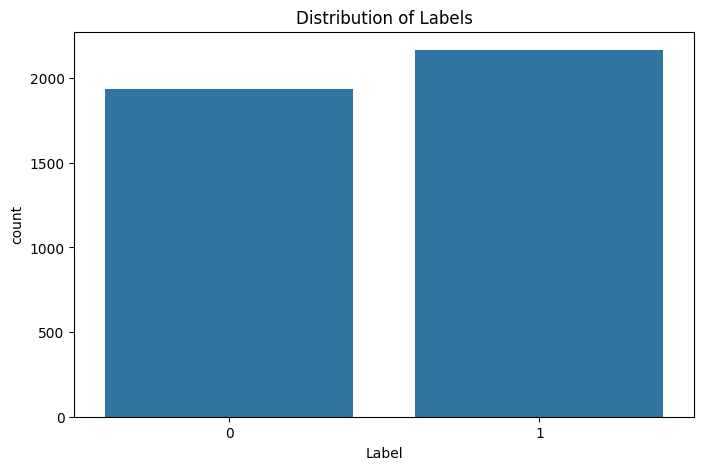

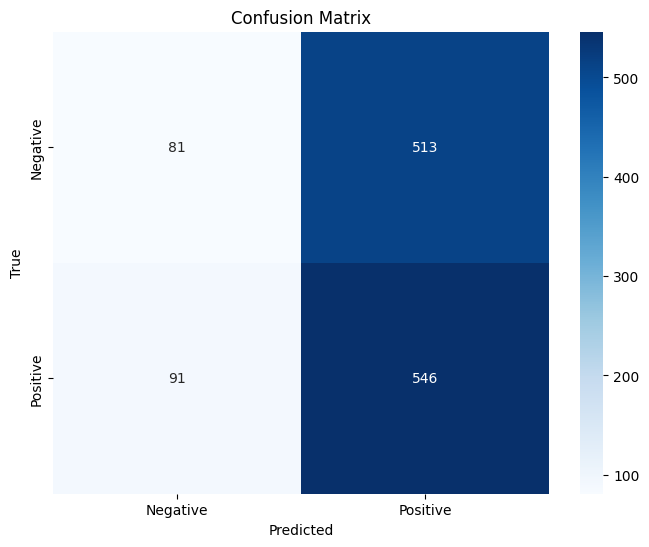

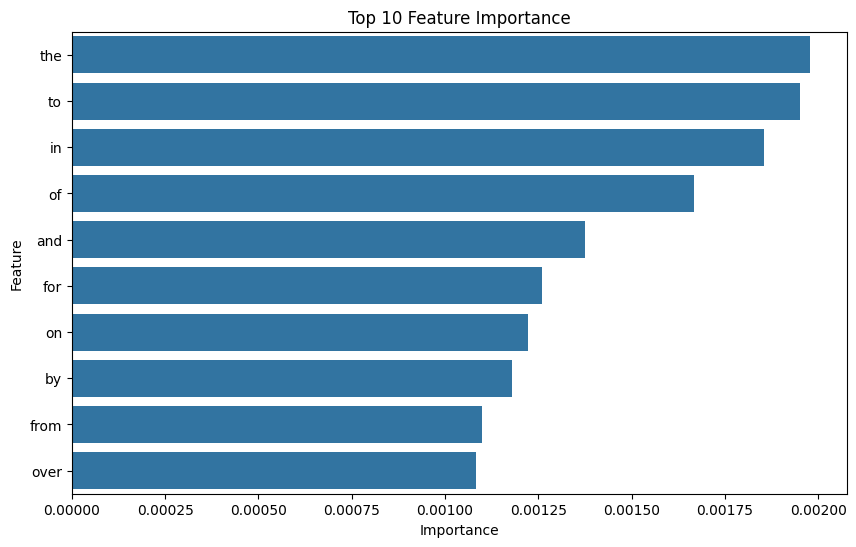

In [ ]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.show()


conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


if hasattr(rf, 'feature_importances_'):
    feature_importance = rf.feature_importances_
    feature_names = cv.get_feature_names_out()

    top_indices = feature_importance.argsort()[-10:][::-1]
    top_features = [feature_names[i] for i in top_indices]


    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance[top_indices], y=top_features)
    plt.title('Top 10 Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


# Explaination


*  First we have to import the neccessary libraries.

*  Importing the dataset related to our project.

*   We created a list called 'news' by concatenating columns 2 to 26 for each row in the dataset.
*   We have to define the target and feature variables.


*  Next we have split the dataset into training and testing sets.


*  We have to train the model by using a machine learning algorithm . Here we used randomforestclassifier to train the data.

*   The trained model is used to make predictions on the test set.

*  Finally we have evaluate the performance of the model.
*   To visualize the results of the code,we used matplotlib and seaborn libraries.



